<a href="https://colab.research.google.com/github/sathish0416/KNN-Algorithm/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 50.0%
Confusion Matrix: {'Iris-setosa': {'Iris-setosa': 1, 'Iris-virginica': 0, 'Iris-versicolor': 0}, 'Iris-virginica': {'Iris-setosa': 0, 'Iris-virginica': 0, 'Iris-versicolor': 0}, 'Iris-versicolor': {'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 0}}


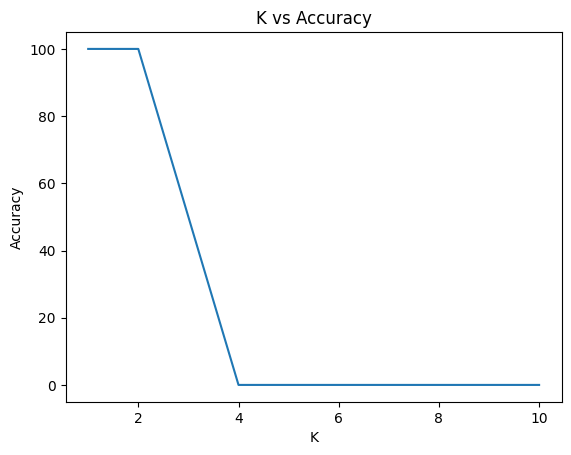

Best K: 1 with accuracy: 100.0%


In [4]:
import math
import random
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

def train_test_split(dataset, split_ratio=0.8):
    random.shuffle(dataset)
    split_index = int(len(dataset) * split_ratio)
    return dataset[:split_index], dataset[split_index:]

def knn(train_data, test_point, k):

    distances = [(euclidean_distance(test_point[:-1], train_point[:-1]), train_point[-1]) for train_point in train_data]

    sorted_distances = sorted(distances, key=lambda x: x[0])[:k]

    top_k_classes = [neighbor[1] for neighbor in sorted_distances]
    predicted_class = Counter(top_k_classes).most_common(1)[0][0]

    return predicted_class

def accuracy_score(true_labels, predicted_labels):
    correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    return correct / len(true_labels) * 100

def confusion_matrix(true_labels, predicted_labels, classes):
    matrix = {class_label: {class_label: 0 for class_label in classes} for class_label in classes}
    for true, pred in zip(true_labels, predicted_labels):
        if true is not None and pred is not None:
            matrix[true][pred] += 1
    return matrix

def k_vs_accuracy(train_data, test_data, max_k):
    accuracies = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        predicted_labels = [knn(train_data, test_point, k) for test_point in test_data]
        true_labels = [test_point[-1] for test_point in test_data]
        accuracies.append(accuracy_score(true_labels, predicted_labels))

    plt.plot(k_values, accuracies)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('K vs Accuracy')
    plt.show()

    best_k = k_values[accuracies.index(max(accuracies))]
    return best_k, max(accuracies)

iris_dataset = [
    [5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
    [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
    [6.2, 3.4, 5.4, 2.3, 'Iris-virginica'],
    [5.9, 3.0, 5.1, 1.8, 'Iris-virginica'],
    [5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'],
    [6.0, 2.2, 4.0, 1.0, 'Iris-versicolor'],

]

train_data, test_data = train_test_split(iris_dataset)

predicted_labels = [knn(train_data, test_point, 3) for test_point in test_data]
true_labels = [test_point[-1] for test_point in test_data]

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}%")

classes = set([point[-1] for point in iris_dataset])
conf_matrix = confusion_matrix(true_labels, predicted_labels, classes)
print("Confusion Matrix:", conf_matrix)

best_k, best_accuracy = k_vs_accuracy(train_data, test_data, max_k=10)
print(f"Best K: {best_k} with accuracy: {best_accuracy}%")
